In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")

In [36]:
df.shape

(50000, 8)

In [37]:
df.sample(10)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
12141,38:00.0,7.3,2012-06-02 16:38:00 UTC,-73.977605,40.753010,-73.988657,40.749547,1
44559,35:59.0,6.1,2009-08-17 08:35:59 UTC,-73.974138,40.778696,-73.953829,40.779481,1
39385,36:00.0,4.5,2010-07-14 23:36:00 UTC,-73.993875,40.756856,-73.995466,40.749394,3
23965,30:00.0,6.5,2010-04-08 00:30:00 UTC,-73.992935,40.724198,-74.003523,40.735962,6
14229,47:00.0,8.1,2012-06-13 11:47:00 UTC,0.000000,0.000000,0.000000,0.000000,1
11340,41:00.0,5.7,2009-01-30 19:41:00 UTC,-73.973715,40.764458,-73.985088,40.759090,1
6441,42:19.0,11.0,2013-01-23 16:42:19 UTC,-73.966588,40.804426,-73.939276,40.792645,1
34552,02:00.0,12.0,2014-03-27 21:02:00 UTC,-74.015247,40.710657,-73.993383,40.730962,1
4984,21:00.0,5.5,2014-07-23 19:21:00 UTC,-73.998167,40.750045,-73.989677,40.744912,2
43467,08:00.0,8.0,2012-10-19 18:08:00 UTC,-73.983612,40.721670,-73.983783,40.738067,1


In [39]:
df.drop("unique_id",axis=1,inplace=True)

In [60]:
df=pd.get_dummies(df,columns=['date_time_of_pickup'])
df.sample(10)

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger_0,no_of_passenger_1,no_of_passenger_2,no_of_passenger_3,no_of_passenger_4,...,date_time_of_pickup_2015-06-30 06:45:23 UTC,date_time_of_pickup_2015-06-30 08:29:06 UTC,date_time_of_pickup_2015-06-30 10:58:55 UTC,date_time_of_pickup_2015-06-30 15:45:14 UTC,date_time_of_pickup_2015-06-30 16:05:50 UTC,date_time_of_pickup_2015-06-30 17:59:31 UTC,date_time_of_pickup_2015-06-30 19:14:39 UTC,date_time_of_pickup_2015-06-30 19:42:23 UTC,date_time_of_pickup_2015-06-30 20:50:04 UTC,date_time_of_pickup_2015-06-30 22:42:39 UTC
41413,10.90,-73.974148,40.748295,-73.978442,40.778230,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34975,12.10,-73.987604,40.719694,-73.956911,40.774848,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
40865,10.50,-73.964485,40.807472,-73.956080,40.781360,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4832,6.50,-74.003652,40.749087,-73.986603,40.769190,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6939,7.70,-73.972367,40.787877,-73.954915,40.803423,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33124,16.50,-73.994272,40.747755,-73.930370,40.756892,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
22783,6.50,-73.982373,40.762492,-73.991925,40.749168,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22350,14.50,-74.003080,40.727492,-73.959183,40.788717,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6448,4.50,-73.976896,40.754414,-73.972563,40.759256,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30127,57.33,-73.790171,40.646805,-73.988235,40.757530,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df.isnull().sum()

amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

In [42]:
df.describe()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [43]:
df.describe(include="all")

,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,50000.000000,50000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
unique,NaN,49555,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-09-03 01:30:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,NaN,NaN,NaN,NaN,NaN
mean,11.364171,NaN,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,NaN,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,NaN,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,NaN,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,NaN,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,NaN,-73.967148,40.767360,-73.963584,40.768167,2.000000


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   amount                50000 non-null  float64
 1   date_time_of_pickup   50000 non-null  object 
 2   longitude_of_pickup   50000 non-null  float64
 3   latitude_of_pickup    50000 non-null  float64
 4   longitude_of_dropoff  50000 non-null  float64
 5   latitude_of_dropoff   50000 non-null  float64
 6   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.7+ MB


In [45]:
df.dtypes

amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

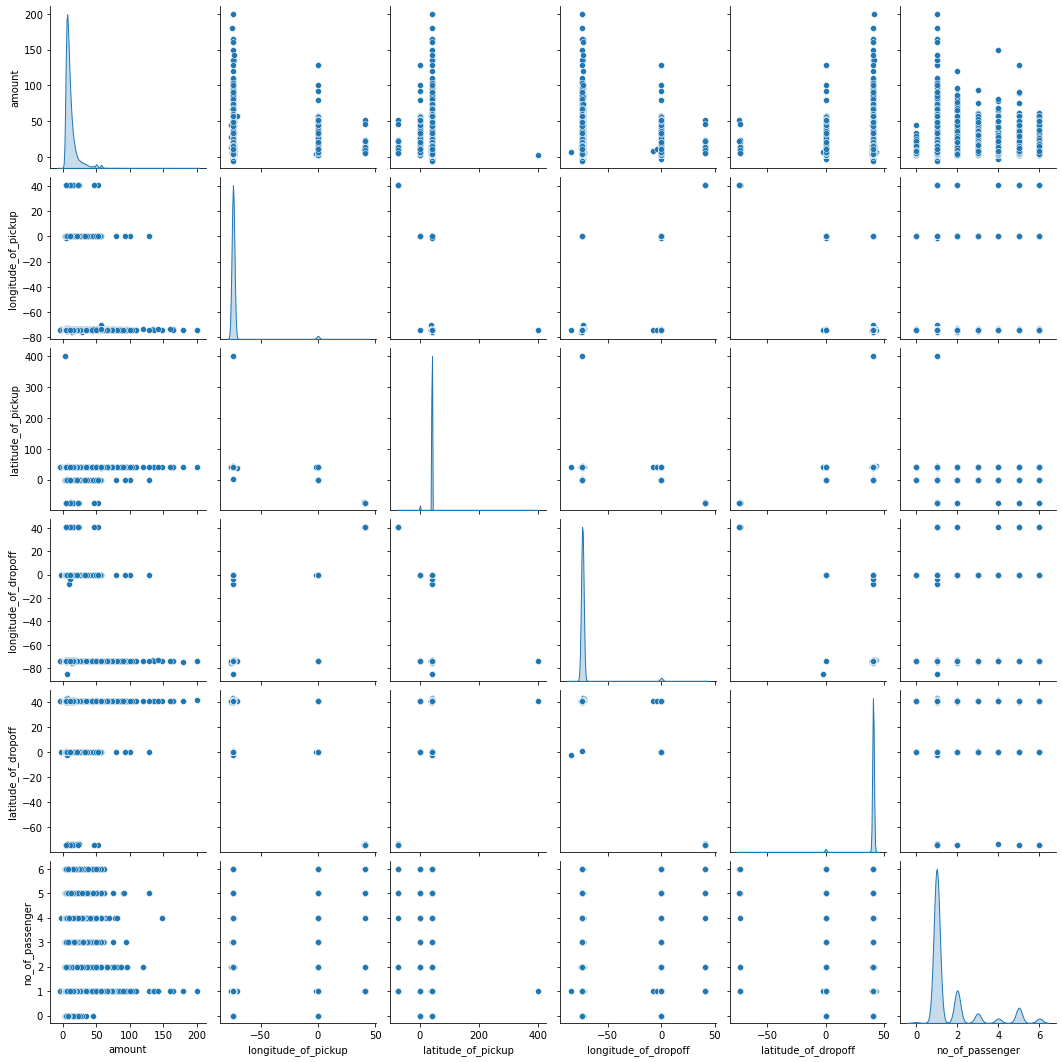

In [21]:
sns.pairplot(df,diag_kind="kde")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


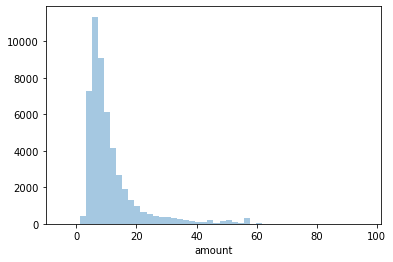

In [20]:
sns.distplot(df[df["amount"]<100]["amount"],kde=False);

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


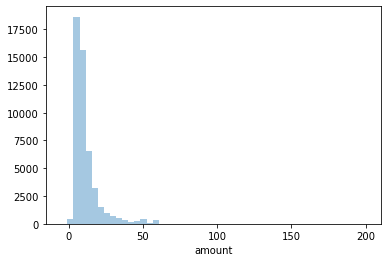

In [23]:
sns.distplot(df["amount"],kde=False);

In [ ]:
df=df[df["amount"]>=0]

In [22]:
len(df)

50000

In [14]:
print(min(df["longitude_of_pickup"].min(), df["longitude_of_dropoff"].min()))

-84.654241


In [15]:
print(min(df["longitude_of_pickup"].max(), df["longitude_of_dropoff"].max()))

40.783472


In [16]:
print(min(df["latitude_of_pickup"].min(), df["latitude_of_dropoff"].min()))

-74.006893


In [19]:
print(min(df["latitude_of_pickup"].max(), df["latitude_of_dropoff"].max()))

43.41519


In [ ]:
def select_within_boundingbox(df, BB):
    return ((df["longitude_of_pickup"] >= BB[0]) & (df["longitude_of_pickup"] <= BB[1]) & 
            (df["latitude_of_pickup"] >= BB[2]) & (df["latitude_of_pickup"] <= BB[3]) &
            (df["longitude_of_dropoff"] >= BB[0]) & (df["longitude_of_dropoff"] <= BB[1]) &
            (df["latitude_of_dropoff"] >= BB[2]) & (df["latitude_of_dropoff"] <= BB[3]))

In [18]:
BB = (-74.3, -73.0, 40.6, 41.7)

In [17]:
print("New size {}".format(len(df)))

New size 50000


In [9]:
def distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [10]:
df["distance_miles"] = distance(df["latitude_of_pickup"], df["longitude_of_pickup"], 
                                      df["latitude_of_dropoff"], df["latitude_of_dropoff"])

In [11]:
df.head(2)

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,distance_miles
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,5474.638781
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5480.556416


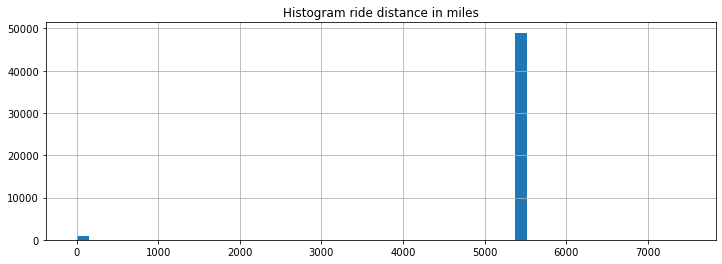

In [12]:
df["distance_miles"].hist(bins=50, figsize=(12,4))
plt.title("Histogram ride distance in miles");

In [13]:
df["distance_miles"].describe()

count    50000.000000
mean      5374.124201
std        739.603934
min          0.000000
25%       5476.097916
50%       5477.504166
75%       5478.866463
max       7457.201172
Name: distance_miles, dtype: float64

In [11]:
df.groupby('no_of_passenger')['distance_miles','amount'].mean()

C:\Users\vasiu\AppData\Local\Temp\ipykernel_22748\3904693668.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('no_of_passenger')['distance_miles','amount'].mean()


,distance_miles,amount
no_of_passenger,,
0,5389.673163,9.414545
1,5369.911227,11.210226
2,5385.644740,12.013336
3,5392.010248,11.219359
4,5368.016913,11.459114
5,5370.108615,11.348665
6,5414.583735,12.535763


Text(0.5, 1.0, 'Zoom in on distance < 15 mile and fare < $100')

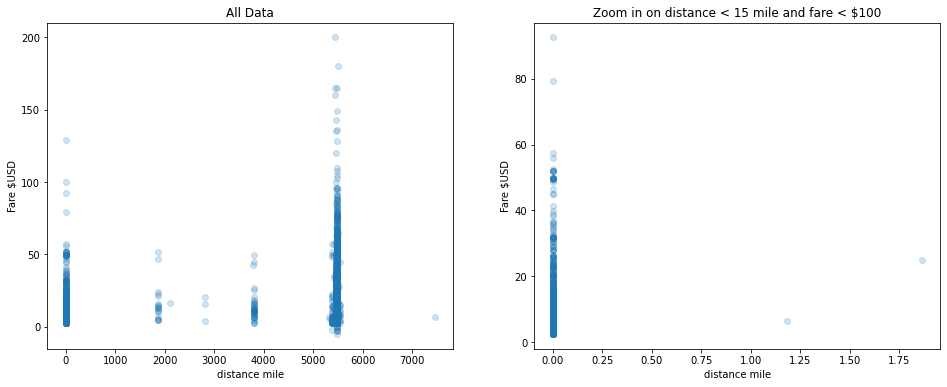

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(16,6))
axs[0].scatter(df["distance_miles"], df["amount"], alpha=0.2)
axs[0].set_xlabel("distance mile")
axs[0].set_ylabel("Fare $USD")
axs[0].set_title("All Data")

# Zoom-in some part of the data
idx = ((df['distance_miles'] < 15) & (df["amount"] < 100))
axs[1].scatter(df[idx]["distance_miles"], df[idx]["amount"], alpha=0.2)
axs[1].set_xlabel("distance mile")
axs[1].set_ylabel("Fare $USD")
axs[1].set_title("Zoom in on distance < 15 mile and fare < $100")

In [13]:
idx = (df["distance_miles"] >= 0.05)
print('Old size: %d' % len(df))
df = df[idx]
print('New size: %d' % len(df))

Old size: 50000
New size: 49086


In [17]:
df["fare_per_mile"] = df["amount"] / df["distance_miles"]

In [18]:
df["fare_per_mile"].describe()

count    49086.000000
mean         0.002463
std          0.065421
min         -0.000913
25%          0.001096
50%          0.001551
75%          0.002283
max         13.409485
Name: fare_per_mile, dtype: float64

Text(0, 0.5, 'fare per distance in mile')

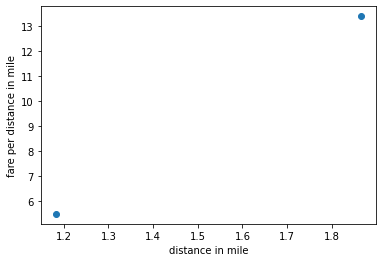

In [20]:
idx = (df["distance_miles"] < 3) & (df["amount"] < 100)
plt.scatter(df[idx]["distance_miles"], df[idx]["fare_per_mile"])
plt.xlabel("distance in mile")
plt.ylabel("fare per distance in mile")

In [6]:
X=df.drop(['amount'],axis=1)
y=df[['amount']]

In [7]:
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

In [8]:
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)

In [7]:
X_train.shape
 #y_train.shape

(37500, 7)

In [8]:
y_train.shape

(37500, 1)

In [10]:
model_1 = LinearRegression()
model_1.fit(X_train,y_train)

LinearRegression()

In [10]:
model_1.score(X_test,y_test)

-0.0007734828716712272

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
dtree=DecisionTreeClassifier(criterion="gini")
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
dtree.score(X_train,y_train)

0.98288

In [15]:
dtree.score(X_test,y_test)

0.01944

In [18]:
dTreeR=DecisionTreeClassifier(criterion="gini",max_depth=3,random_state=0)
dTreeR.fit(X_train,y_train)
print(dTreeR.score(X_train,y_train))

0.05466666666666667


In [19]:
y_predict=dTreeR.predict(X_test)

In [18]:
print(dTreeR.score(X_test,y_test))

0.0236


In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly=PolynomialFeatures(degree=2,interaction_only=True)
X_train2=poly.fit_transform(X_train)
X_test2=poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train2,y_train)

print(poly_clf.score(X_train2,y_train))


0.003340955028011794


In [20]:
print(poly_clf.score(X_test2,y_test))

-0.3358490274467225


In [21]:
from sklearn.ensemble import AdaBoostClassifier
abcl=AdaBoostClassifier(n_estimators=120,random_state=0)
abcl=abcl.fit(X_train,y_train)
y_predict=abcl.predict(X_test)
print(abcl.score(X_test,y_test))

0.02432


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier(n_estimators=120,random_state=0)
gbcl=gbcl.fit(X_train,y_train)
y_predict=gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=160,random_state=0,max_features=3)
rfcl=rfcl.fit(X_train,y_train)

In [ ]:
y_predict=rfcl.predict(X_test)
print(rfcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_predict,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in["No","Yes"]],
                  columns=[i for i in["No","Yes"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')